In [1]:
from notebook_environment import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

Added '../tools/' to the path.


In [2]:
rpkm__gene_x_ccle_cellline = ccal.read_gct(
    '../data/rpkm__gene_x_ccle_cellline.gct')
print(rpkm__gene_x_ccle_cellline.shape)

kras_relevant_genes = pd.read_table(
    '../results/kras_relevant_genes.txt', header=None, squeeze=True)
print(kras_relevant_genes.shape)

rpkm__kras_relevant_gene_x_ccle_cellline = rpkm__gene_x_ccle_cellline.loc[
    kras_relevant_genes, :]
print(rpkm__kras_relevant_gene_x_ccle_cellline.shape)

(48642, 750)
(1000,)
(1000, 750)


In [3]:
# Drop rows & columns with only 1 unique object (like all None)
df = ccal.drop_df_slices(
    rpkm__kras_relevant_gene_x_ccle_cellline, 0, max_n_unique_objects=1)
df = ccal.drop_df_slices(df, 1, max_n_unique_objects=1)

# Normalize
array_2d = ccal.normalize_2d_array(df.values, 'rank', axis=0)

# Scale
array_2d *= 10000

# Convert to DataFrame
rpkm__kras_relevant_gene_x_ccle_cellline = pd.DataFrame(
    array_2d, index=df.index, columns=df.columns)

# nmfs, nmf_ccs, cccs = ccal.define_components(
#     rpkm__kras_relevant_gene_x_ccle_cellline,
#     range(2, 11),
#     '../results',
#     algorithm='ls',
#     n_clusterings=30,
#     n_jobs=9,
#     random_seed=6137)

Dropping 0 axis-0 slices ...
Dropping 0 axis-1 slices ...


In [4]:
w_matrix = pd.read_table('../results/nmf_k9_w.txt', index_col=0)
h_matrix = pd.read_table('../results/nmf_k9_h.txt', index_col=0)

In [5]:
# Re-label components to have same names as in the paper
indices = [
    'C1',
    'C3',
    'C9',
    'C8',
    'C6',
    'C7',
    'C5',
    'C2',
    'C4',
]

w_matrix.columns = indices
h_matrix.index = indices

w_matrix.to_csv('../results/nmf_k9_w.txt', sep='\t')
h_matrix.to_csv('../results/nmf_k9_h.txt', sep='\t')

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


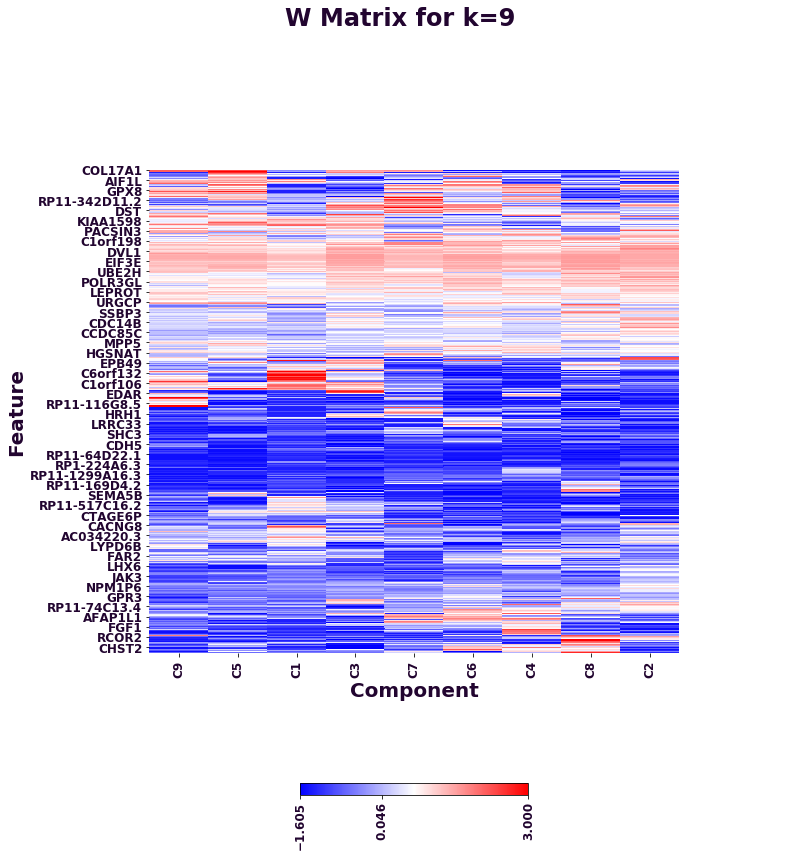

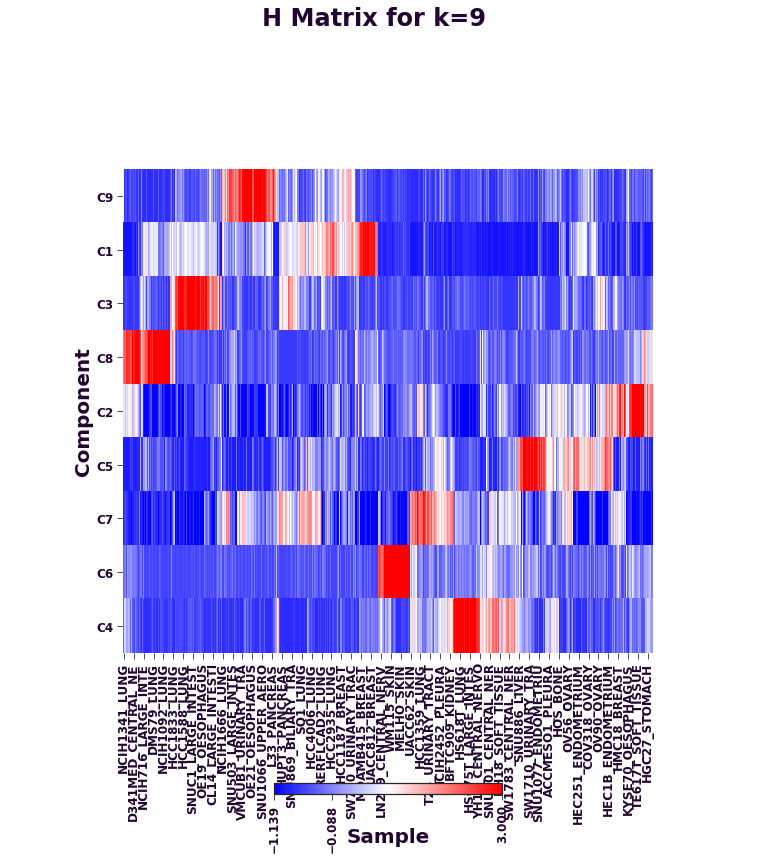

In [6]:
ccal.plot_nmf(w_matrix, h_matrix, figure_size=(16, 16))

Applying <function compute_information_coefficient at 0x7fe576669488> (1/9) ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


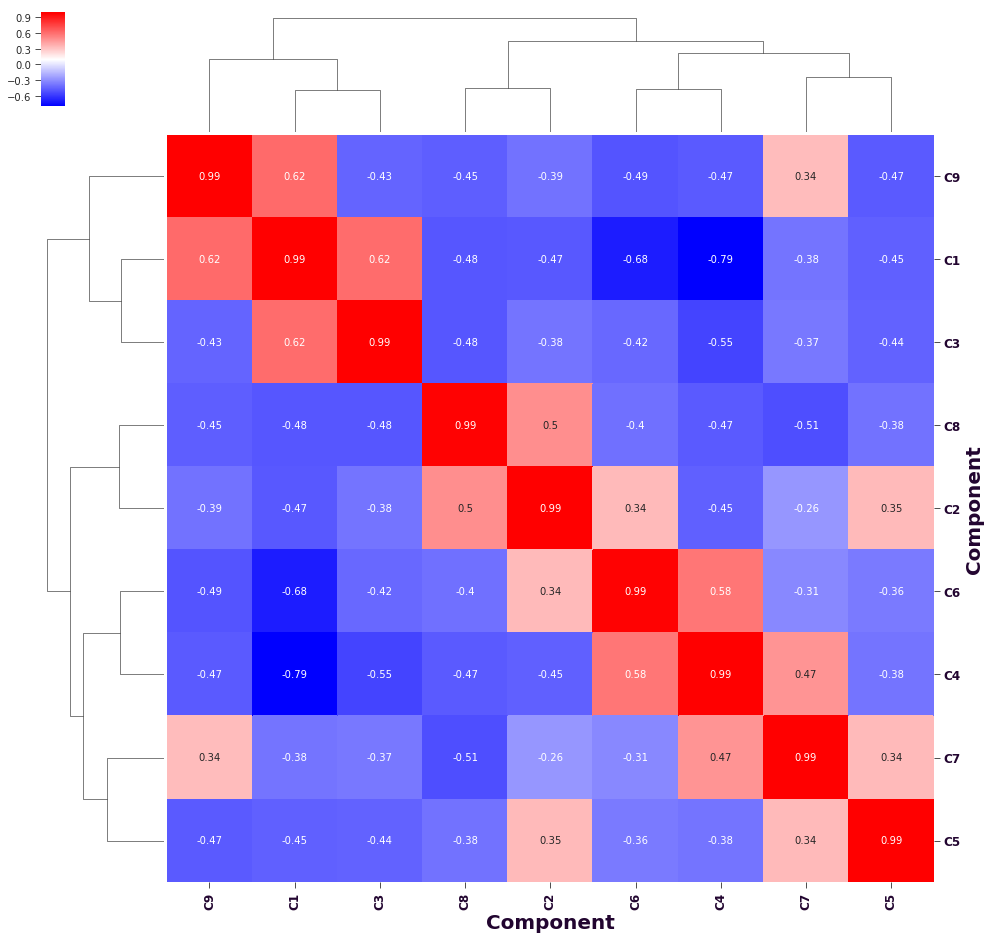

,C1,C3,C9,C8,C6,C7,C5,C2,C4
C1,0.993211,0.618360,0.619073,-0.482277,-0.684898,-0.375985,-0.447607,-0.474957,-0.785337
C3,0.618360,0.990896,-0.431972,-0.481347,-0.417796,-0.366643,-0.444453,-0.376321,-0.547097
C9,0.619073,-0.431972,0.992197,-0.454180,-0.488886,0.339779,-0.468196,-0.388273,-0.472228
C8,-0.482277,-0.481347,-0.454180,0.985058,-0.395221,-0.513312,-0.382879,0.496671,-0.465809
C6,-0.684898,-0.417796,-0.488886,-0.395221,0.986100,-0.308961,-0.355839,0.344208,0.581471
C7,-0.375985,-0.366643,0.339779,-0.513312,-0.308961,0.991514,0.343476,-0.260692,0.473975
C5,-0.447607,-0.444453,-0.468196,-0.382879,-0.355839,0.343476,0.993971,0.347134,-0.376030
C2,-0.474957,-0.376321,-0.388273,0.496671,0.344208,-0.260692,0.347134,0.993189,-0.445775
C4,-0.785337,-0.547097,-0.472228,-0.465809,0.581471,0.473975,-0.376030,-0.445775,0.992467


In [7]:
ccal.make_comparison_panel(
    h_matrix,
    h_matrix,
    axis=1,
    array_2d_0_name='Component',
    array_2d_1_name='Component')